In [3]:
import wget

In [8]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [9]:
wget.download('https://bit.ly/fruits_300_data')

 81% [............................................................              ] 2433024 / 3000128

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data'

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
fruits=np.load('fruits_300_data')

In [12]:
fruits.shape

(300, 100, 100)

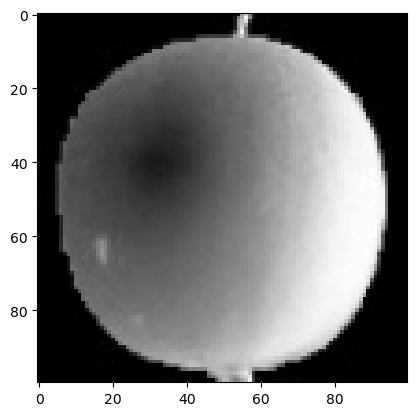

In [13]:
plt.imshow(fruits[0],cmap='gray')
plt.show()

In [14]:
apple=fruits[0:100].reshape(-1,100*100)
pineapple=fruits[100:200].reshape(-1,100*100)
banana=fruits[200:300].reshape(-1,100*100)#1차원 배열로 변환-> 계산할 때 편리

In [15]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

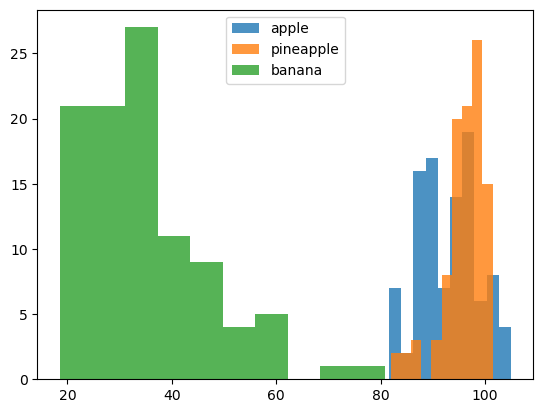

In [19]:
plt.hist(np.mean(apple , axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana,axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

In [20]:
#파인애플과 사과는 픽셀로는 구분이 흠들다
#샘플의 평균 말고 각 픽셀의 평균으로 비교하면?

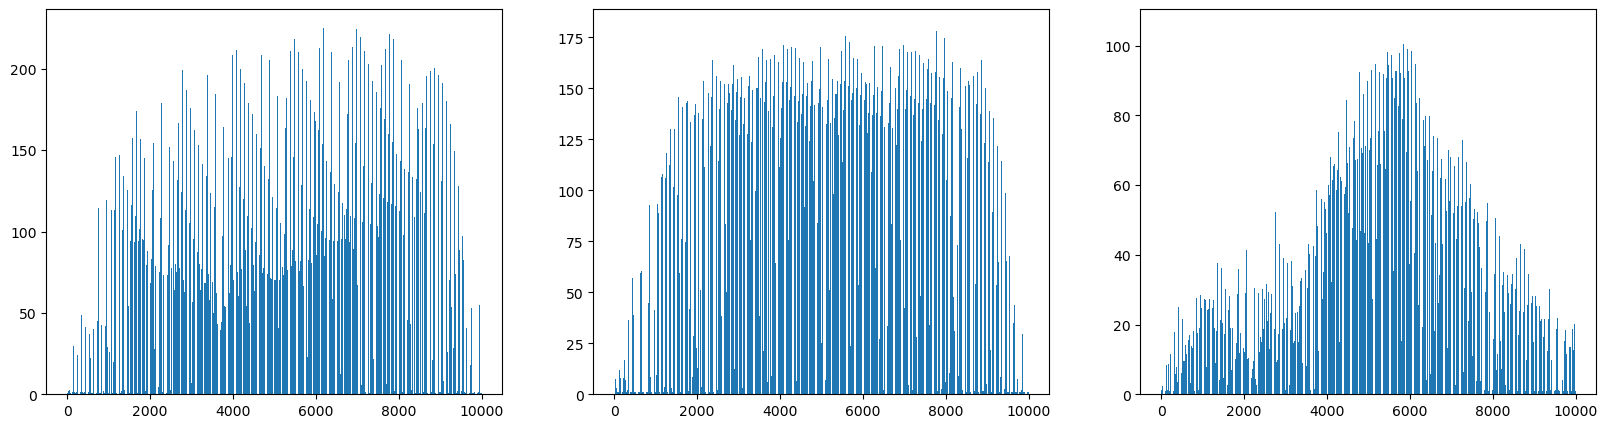

In [21]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple,axis=0))
axs[1].bar(range(10000), np.mean(pineapple,axis=0))
axs[2].bar(range(10000), np.mean(banana,axis=0))
plt.show()

In [22]:
apple_mean=np.mean(apple,axis=0).reshape(100,100)
pineapple_mean=np.mean(pineapple, axis=0).reshape(100,100)
banana_mean=np.mean(banana,axis=0).reshape(100,100)

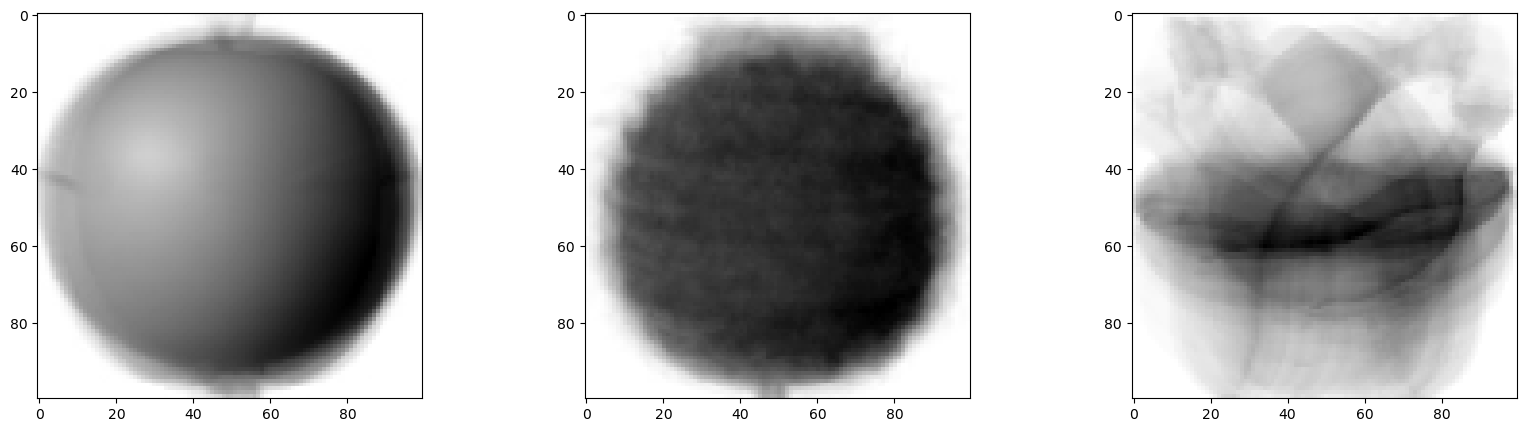

In [25]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

In [26]:
abs_diff=np.abs(fruits-apple_mean)
abs_mean=np.mean(abs_diff,axis=(1,2))
abs_mean.shape

(300,)

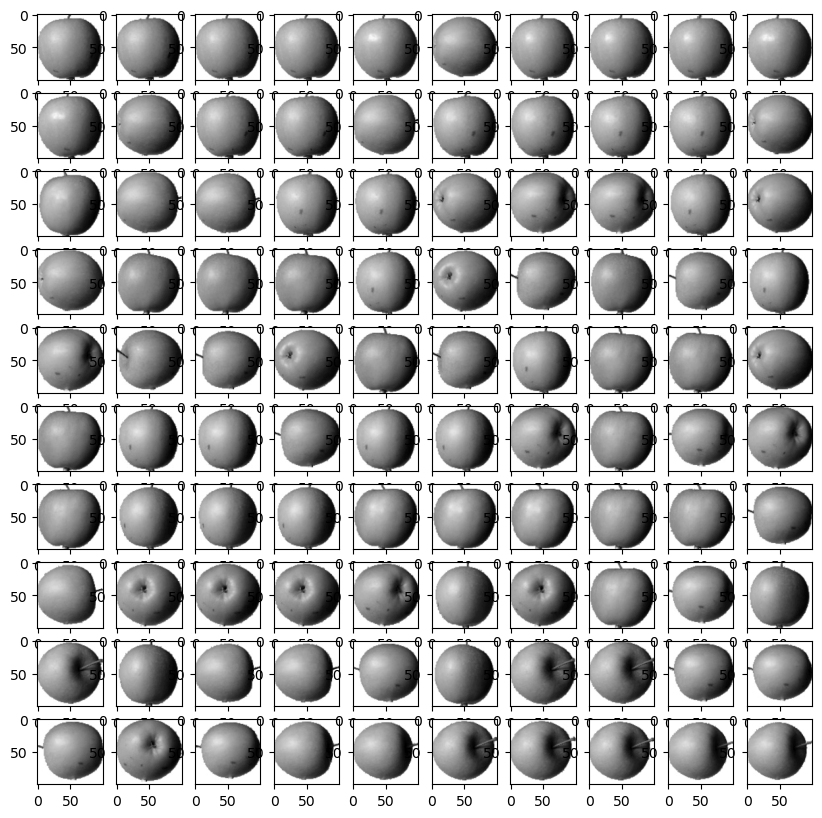

In [28]:
apple_index=np.argsort(abs_mean)[:100]
fig,axs=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('on')
plt.show()